# Detecting vehicles in images using HOG and SVM

### Importing Libraries 

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

### Storing info about datasets

In [3]:
def data_look(car_list, notcar_list):
    data_dict = {}
        # storing the length of car images in data_dict as number of car entries
    data_dict["n_cars"] = len(car_list)
        # storing the length of non-car images in data_dict as number of non-car entries
    data_dict["n_notcars"] = len(notcar_list)
        # test image to check
    car_img = mpimg.imread(car_list[0])
        # storing image shape
    data_dict["image_shape"] = car_img.shape
        # storing data type of image
    data_dict["data_type"] = car_img.dtype
        # Returning data_dict
    return data_dict

### Function To Visualize Images

In [2]:
def visualize_images(input_images, num_cols, figure_name, cmap = None):
    #Shows input images by stacking them in num_cols columns
    fig, axes = plt.subplots((int)((len(input_images) + 1) /num_cols), num_cols, figsize=(24, 20))

    fig = plt.gcf()
    fig.canvas.set_window_title(figure_name)
    
    print(figure_name)
    
    for ax, image in zip(axes.flat, input_images):
        if(cmap == "gray" or cmap == 'hot'):
            ax.imshow(image, cmap=cmap)
        elif(image.shape[2]==1):
            ax.imshow(image[:,:,0], cmap = cmap)
        else:
            ax.imshow(image, cmap=cmap)

    plt.show()

### Load Images from dataset

In [5]:
import glob


#Reading Dataset
vehicles_dir =     '../data/vehicles/'
non_vehicles_dir = '../data/non-vehicles/'

# defining car and non-car lists
cars = []
notcars = []

# Read vehicle images
images = glob.iglob(vehicles_dir + '/**/*.png', recursive=True)

for image in images:
        cars.append(image)
        
# Read non-vehicle images
images = glob.iglob(non_vehicles_dir + '/**/*.png', recursive=True)

for image in images:
        notcars.append(image)

data_info = data_look(cars, notcars)

#Make Sure Function Imported the dataset
# print('Your function returned a count of', 
#       data_info["n_cars"], ' cars and', 
#       data_info["n_notcars"], ' non-cars')
# print('of size: ',data_info["image_shape"], ' and data type:', 
#       data_info["data_type"])

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


### Visualize sample images for car and not car types

In [13]:
# #Visualize some input images to test the dataset
# import random
# #choosing random samples from cars and non-cars images
# num_images = 10

# 
# cars_samples = random.sample(list(cars), num_images)
# notcar_samples = random.sample(list(notcars), num_images)
    
# # Read in car / not-car images
# car_images = []
# notcar_images = []
# for sample in cars_samples:
#     car_images.append(mpimg.imread(sample))
    
# for sample in notcar_samples:
#     notcar_images.append(mpimg.imread(sample))

# visualize_images(car_images, num_images, "Example Car images")
# visualize_images(notcar_images, num_images, "Example not-car images")

In [14]:
#Functions to generate more images
import cv2 
import random

def translate_image(image, pos_range=2):
    """Perturbs the image by translating the image by - pos_range to + pos_range pixels"""
    rows, cols = image.shape[:2] 
    pos_x = pos_range * np.random.uniform() - pos_range/2
    pos_y = pos_range * np.random.uniform() - pos_range/2
    pos_M = np.float32([[1, 0, pos_x],[0, 1, pos_y]])

    return cv2.warpAffine(image, pos_M, (cols,rows))

def scale_image(image, scale = [1.0, 1.1, 1.2]):
    """Perturbs the image by the scale randomly selected from the 'scale' array"""
    scale_M = random.sample(scale, 1)[0]
    image = cv2.resize(image, None, fx = scale_M, fy = scale_M, interpolation = cv2.INTER_AREA)
    return image[0:64, 0:64, :]

def rotate_image(image, rot_range = 2):
    """Perturbs the image by rotation it by an angle randomly selected from rot_rangle"""
    rows, cols = image.shape[:2] 
    rot = np.random.uniform(rot_range)- rot_range/2
    rot_M = cv2.getRotationMatrix2D((cols/2, rows/2), rot, 1)
    
    return cv2.warpAffine(image, rot_M, (cols,rows))

def affine_image(image, affine_range = 2):
    #Affine Transform
    rows, cols = image.shape[:2] 
    pts1 = np.float32([[5, 5],[10, 5],[5, 10]])

    pt1 = 5 + affine_range * np.random.uniform() - affine_range/2
    pt2 = 10 + affine_range * np.random.uniform() - affine_range/2

    pts2 = np.float32([[pt1, 5],[pt2, pt1],[5, pt2]])

    affine_M = cv2.getAffineTransform(pts1, pts2)
    return cv2.warpAffine(image, affine_M, (cols,rows))

def transform_image(image, pos_range = 2, rot_range = 2, scale = [1, 1.1], affine_range = 2):    
    image = translate_image(image, pos_range=5) 
    image = rotate_image(image, rot_range = 5)
    image = scale_image(image, scale = [1.2, 1.4, 1.0])
    is_blurred = random.sample([0, 1], 1)
    if is_blurred[0]:
        image = cv2.GaussianBlur(image,(3,3),0)

    return image

###  Select and visualize different color spaces

In [3]:
def convert_color(img, conv='RGB2YCrCb'):
    
    #Converting the image from one color space to another
    
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2HLS':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    if conv == 'RGB2HSV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    if conv == 'Gray':
        return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if conv == 'RGB2YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

In [4]:
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    #Plotting in 3D

    # Create figure and 3D axes
    fig = plt.figure(figsize=(6, 6))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

### Extracting Features to train model

In [17]:
from skimage.feature import hog

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    """
    Return the hog features of the given input image
    Call with two outputs if vis==True"""
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualize=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualize=vis, feature_vector=feature_vec)
        return features

In [48]:
orient = 9
pix_per_cell = 8
cell_per_block = 2

car_features, hog_image = get_hog_features(cv2.cvtColor(car_images[1], cv2.COLOR_RGB2GRAY), orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)

notcar_features, notcar_hog_image = get_hog_features(cv2.cvtColor(notcar_images[2], cv2.COLOR_RGB2GRAY), orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)

# # Plot the examples
# fig = plt.figure()
# plt.subplot(131)
# plt.imshow(car_images[1])
# plt.title('Example Car Image')
# plt.subplot(132)
# plt.imshow(hog_image, cmap='gray')
# plt.title('car HOG Visualization')
# plt.subplot(133)
# plt.imshow(notcar_hog_image, cmap='gray')
# plt.title('not car HOG Visualization')

In [20]:
def bin_spatial(img, size=(16, 16)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))

In [21]:
# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [22]:
# Define a function to extract features from a list of images
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                        spatial_feat=False, hist_feat=False, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        image = (image * 255).astype(np.uint8)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)   

            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

###  Train the classifier with the extracted features

In [23]:
import time
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

colorspace = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size=(32, 32)
hist_bins=32

t=time.time()

car_features = extract_features(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, hist_bins=hist_bins)
notcar_features = extract_features(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, hist_bins=hist_bins)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64) 
print(X.shape)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

print(len(y))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.15, random_state=rand_state)

#X_train, X_test = shuffle(X_train, y_train, random_state=rand_state)
# # Compute a PCA  on the features 
# n_components = 4932

# print("Extracting the top %d features from %d total features"
#       % (n_components, X_train.shape[1]))

# pca = PCA(n_components=n_components, svd_solver='randomized',
#           whiten=True).fit(X_train)

# X_train_pca = pca.transform(X_train)
print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

# Use a linear SVC X_scaler
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

106.2 Seconds to extract HOG features...
(17760, 5292)
17760
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 5292
22.13 Seconds to train SVC...


C:\Users\tiger\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [17]:
# print(np.arange(4932).shape)
# test = X_scaler.transform(np.zeros(4932, 4932))
# print(svc.predict(np.arange(5292).reshape(-1,1)))

### Checking The Accuracy of the trained data model

In [24]:
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Test Accuracy of SVC =  0.9839
My SVC predicts:  [0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
For these 10 labels:  [0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
0.00644 Seconds to predict 10 labels with SVC


#### Save the training model 

In [50]:
import pickle

#Pickle the data for faster performance

import os
data_file = '../results/model/svc_pickle.p'

if not os.path.isfile(data_file):
    with open(data_file, 'wb') as pfile:
        pickle.dump(
            {
                'svc': svc,
                'scaler': X_scaler,
                'orient': orient,
                'pix_per_cell': pix_per_cell,
                'cell_per_block': cell_per_block,
                'spatial_size': spatial_size,
                'hist_bins': hist_bins
                
            },
            pfile, pickle.HIGHEST_PROTOCOL)

#print('Data saved in pickle file')

Data saved in pickle file


#### Load the training model

In [52]:
dist_pickle = pickle.load( open("../results/model/svc_pickle.p", "rb" ) )
print(dist_pickle)
svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]

{'scaler': StandardScaler(), 'orient': 9, 'svc': LinearSVC(), 'spatial_size': (32, 32), 'hist_bins': 32, 'cell_per_block': 2, 'pix_per_cell': 8}


#### Load the test images to test on them

In [36]:
# #Read cars and not-cars images

# #Data folders
# test_images_dir = '../test_images/'

# # images are divided up into vehicles and non-vehicles
# test_images = []

# images = glob.glob(test_images_dir + '*.jpg')

# for image in images:
#         test_images.append(mpimg.imread(image))

### Steps for running the models of the test images
a. Do a sliding window search with different window scales tp detect bounding boxes  
b. Merge the bounding boxes using heat maps and thresholding  
c. Display bounding boxes on the images  

In [53]:

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, vis_bboxes = False):
    
    draw_img = np.copy(img)
    xstart = int(img.shape[1]/5)
    xstop = img.shape[1]
    img_tosearch = img[ystart:ystop, xstart:xstop,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YUV')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step

    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    rectangles = []

    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3)).reshape(1, -1)
            
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            test_features = X_scaler.transform(hog_features) 
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1 or vis_bboxes == True:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                rectangles.append(((xbox_left+xstart, ytop_draw+ystart),(xbox_left+win_draw+xstart,ytop_draw+win_draw+ystart)))
                              
    return rectangles

In [54]:
def get_rectangles(image, scales = [1, 1.5, 2, 2.5, 3], 
                   ystarts = [400, 400, 450, 450, 460], 
                   ystops = [528, 550, 620, 650, 700]):
    out_rectangles = []
    for scale, ystart, ystop in zip(scales, ystarts, ystops):
        rectangles = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        if len(rectangles) > 0:
            out_rectangles.append(rectangles)
    out_rectangles = [item for sublist in out_rectangles for item in sublist] 
    return out_rectangles

In [55]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

In [56]:
def apply_threshold(heatmap, threshold):
    heatmap[heatmap <= threshold] = 0
    return heatmap

In [57]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    img_copy = np.copy(img)
    result_rectangles = []
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        area = (bbox[1][1] - bbox[0][1]) * (bbox[1][0] - bbox[0][0])
        if area > 40 * 40:
            result_rectangles.append(bbox)
            # Draw the box on the image
            cv2.rectangle(img_copy, bbox[0], bbox[1], (0,255,0), 6)
    # Return the image
    return result_rectangles, img_copy

In [61]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # copy the image
    imcopy = np.copy(img)
    random_color = False
    # Iterate through the bounding boxes
    for bbox in bboxes:
        if color == 'random' or random_color:
            color = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
            random_color = True
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [62]:
def visualize_bboxes(image, scales = [1, 1.5, 2, 2.5, 3], 
                   ystarts = [400, 400, 450, 450, 460], 
                   ystops = [528, 550, 620, 650, 700]):
    out_rectangles = []
    for scale, ystart, ystop in zip(scales, ystarts, ystops):
        rectangles = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, vis_bboxes = True)
        if len(rectangles) > 0:
            out_rectangles.append(rectangles)
    out_rectangles = [item for sublist in out_rectangles for item in sublist] 

    plt.figure(figsize=(20,10))
    plt.imshow(draw_boxes(image, out_rectangles, color='random', thick=3))

In [65]:
# from scipy.ndimage.measurements import label
# visualize_images(result_img_all_boxes, 2, "test")
# result_images = []
# result_boxes = []
# heatmap_images = []
# result_img_all_boxes = []
# for test_image in test_images:
#     rectangles = get_rectangles(test_image)
#     result_img_all_boxes.append(draw_boxes(test_image, rectangles, color='random', thick=3))
#     heatmap_image = np.zeros_like(test_image[:, :, 0])
#     heatmap_image = add_heat(heatmap_image, rectangles)
#     heatmap_images.append(heatmap_image)
#     heatmap_image = apply_threshold(heatmap_image, 2)
#     labels = label(heatmap_image)
#     rectangles, result_image = draw_labeled_bboxes(test_image, labels)
#     result_boxes.append(rectangles)
#     result_images.append(result_image)

test


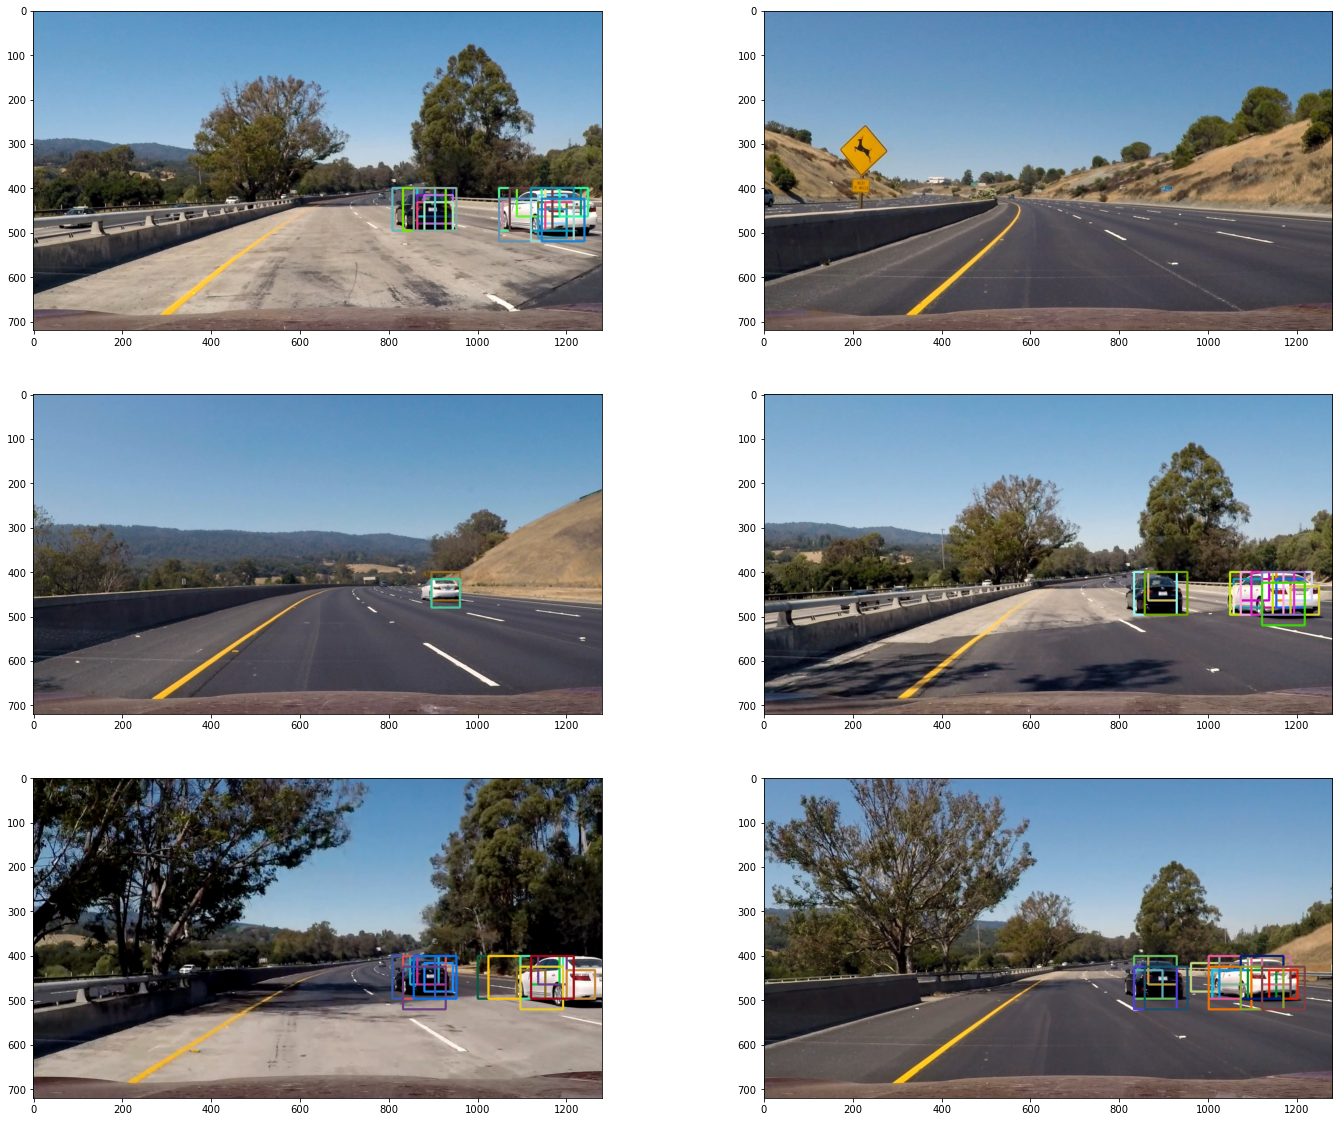

In [50]:
# visualize_images(result_img_all_boxes, 2, "test")

In [37]:
# visualize_images(result_images, 2, "test")

In [38]:
# visualize_images(heatmap_images, 2, "Heatmap", cmap="hot")

## Video Processing

In [66]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import queue
from scipy.ndimage.measurements import label

In [67]:
class DetectionInfo():
    def __init__(self):
        self.max_size = 10
        self.old_bboxes = queue.Queue(self.max_size) 
        self.heatmap = np.zeros_like(test_images[0][:, :, 0])
        
    def get_heatmap(self):
        self.heatmap = np.zeros_like(test_images[0][:, :, 0])
        if self.old_bboxes.qsize() == self.max_size:
            for bboxes in list(self.old_bboxes.queue):
                self.heatmap = add_heat(self.heatmap, bboxes)
                #self.heatmap = apply_threshold(self.heatmap, 2)
            self.heatmap = apply_threshold(self.heatmap, 20)
        return self.heatmap
    
    def get_labels(self):
        return label(self.get_heatmap())
        
    def add_bboxes(self, bboxes):
        if len(bboxes) < 1:
            return
        if self.old_bboxes.qsize() == self.max_size:
            self.old_bboxes.get()
        self.old_bboxes.put(bboxes)
            

In [45]:
def find_vehicles(image):
    bboxes = get_rectangles(image) 
    detection_info.add_bboxes(bboxes)
    labels = detection_info.get_labels()
    if len(labels) == 0:
        result_image = image
    else:
        bboxes, result_image = draw_labeled_bboxes(image,labels)

    return result_image

### Test on Video

In [49]:
detection_info = DetectionInfo()
detection_info.old_heatmap = np.zeros_like(test_images[0][:, :, 0])
project_video_path = '../project_video.mp4'
project_video_output = '../outputvideo2.mp4'

project_video = VideoFileClip(project_video_path)
white_clip = project_video.fl_image(find_vehicles) #NOTE: this function expects color images!!
%time white_clip.write_videofile(project_video_output, audio=False)

t:   0%|                                                                            | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video ../outputvideo2.mp4.
Moviepy - Writing video ../outputvideo2.mp4



Moviepy - Done !
Moviepy - video ready ../outputvideo2.mp4
Wall time: 9min 38s
